Best parameters: {'n_estimators': 400, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 7, 'learning_rate': 0.05} 
RMSE: 7.27829388170363

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, make_scorer
from sklearn.model_selection import train_test_split

In [11]:
df_pred=pd.read_csv("df_cc.csv")
df_pred.drop('Unnamed: 0', axis=1, inplace=True)
df_pred

,id,device_id,active_power,direct_power,charge_capacity,date_time,T,U,Ff,RRR,...,T_b,U_b,Ff_b,RRR_b,DD_WE_b,DD_NS_b,Po(p)_b,POA_b,difference,hour
0,104983,6,2.31,2.69,1.8,2024-02-23 08:00:00,5.2,95,1,17.0,...,5.8,86.0,2.0,3.0,1.0,1.0,1013.05,0.0,0 days 03:00:00,8
1,104984,7,2.38,2.79,1.9,2024-02-23 08:00:00,5.2,95,1,17.0,...,5.8,86.0,2.0,3.0,1.0,1.0,1013.05,0.0,0 days 03:00:00,8
2,104985,8,2.37,2.83,1.9,2024-02-23 08:00:00,5.2,95,1,17.0,...,5.8,86.0,2.0,3.0,1.0,1.0,1013.05,0.0,0 days 03:00:00,8
3,104986,9,2.44,2.84,2.2,2024-02-23 08:00:00,5.2,95,1,17.0,...,5.8,86.0,2.0,3.0,1.0,1.0,1013.05,0.0,0 days 03:00:00,8
4,104987,10,2.32,2.68,1.8,2024-02-23 08:00:00,5.2,95,1,17.0,...,5.8,86.0,2.0,3.0,1.0,1.0,1013.05,0.0,0 days 03:00:00,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,106183,6,3.70,4.24,0.9,2024-03-04 08:00:00,9.6,88,3,0.5,...,9.6,76.0,2.0,0.0,-1.0,0.0,1004.72,0.0,0 days 03:00:00,8
251,106184,7,3.80,3.99,0.9,2024-03-04 08:00:00,9.6,88,3,0.5,...,9.6,76.0,2.0,0.0,-1.0,0.0,1004.72,0.0,0 days 03:00:00,8
252,106185,8,3.80,4.19,0.9,2024-03-04 08:00:00,9.6,88,3,0.5,...,9.6,76.0,2.0,0.0,-1.0,0.0,1004.72,0.0,0 days 03:00:00,8
253,106186,9,4.02,4.39,0.8,2024-03-04 08:00:00,9.6,88,3,0.5,...,9.6,76.0,2.0,0.0,-1.0,0.0,1004.72,0.0,0 days 03:00:00,8


In [12]:
df_pred.isna().any()

id                 False
device_id          False
active_power       False
direct_power       False
charge_capacity    False
date_time          False
T                  False
U                  False
Ff                 False
RRR                False
DD_WE              False
DD_NS              False
Po(p)              False
POA                False
cc_diff            False
active_power_b     False
date_time_b        False
T_b                False
U_b                False
Ff_b               False
RRR_b              False
DD_WE_b            False
DD_NS_b            False
Po(p)_b            False
POA_b              False
difference         False
hour               False
dtype: bool

In [13]:
features = ['T', 'U', 'Ff',	'RRR', 'DD_WE', 'DD_NS', 'POA', 'Po(p)', 'hour',
            'T_b', 'U_b', 'Ff_b', 'RRR_b', 'DD_WE_b', 'DD_NS_b', 'POA_b', 'Po(p)_b']

X_pred = df_pred[features]
y_pred = df_pred['cc_diff']

In [14]:
df=pd.read_csv("../models_cc_data/df_cc_init.csv")
df.drop('Unnamed: 0', axis=1, inplace=True)
df

,id,device_id,active_power,direct_power,charge_capacity,date_time,T,U,Ff,RRR,...,date_time_b,T_b,U_b,Ff_b,RRR_b,DD_WE_b,DD_NS_b,Po(p)_b,POA_b,hour
0,19128,6,65.24,66.29,195.2,2023-09-14 11:00:00,31.2,60.0,2.0,0.0,...,2023-09-14 08:00:00,27.5,83.0,0.0,0.0,-1.0,0.0,996.39,441.37,11
1,19129,7,72.97,74.12,196.3,2023-09-14 11:00:00,31.2,60.0,2.0,0.0,...,2023-09-14 08:00:00,27.5,83.0,0.0,0.0,-1.0,0.0,996.39,441.37,11
2,19130,8,65.92,66.98,199.0,2023-09-14 11:00:00,31.2,60.0,2.0,0.0,...,2023-09-14 08:00:00,27.5,83.0,0.0,0.0,-1.0,0.0,996.39,441.37,11
3,19131,9,72.45,73.67,232.2,2023-09-14 11:00:00,31.2,60.0,2.0,0.0,...,2023-09-14 08:00:00,27.5,83.0,0.0,0.0,-1.0,0.0,996.39,441.37,11
4,19132,10,60.01,60.98,182.0,2023-09-14 11:00:00,31.2,60.0,2.0,0.0,...,2023-09-14 08:00:00,27.5,83.0,0.0,0.0,-1.0,0.0,996.39,441.37,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2390,50268,6,8.44,8.78,55.4,2024-02-22 14:00:00,8.0,96.0,2.0,4.0,...,2024-02-22 11:00:00,8.5,98.0,2.0,5.0,1.0,0.0,1011.46,959.15,14
2391,50269,7,7.66,7.94,55.2,2024-02-22 14:00:00,8.0,96.0,2.0,4.0,...,2024-02-22 11:00:00,8.5,98.0,2.0,5.0,1.0,0.0,1011.46,959.15,14
2392,50270,8,8.21,8.45,54.5,2024-02-22 14:00:00,8.0,96.0,2.0,4.0,...,2024-02-22 11:00:00,8.5,98.0,2.0,5.0,1.0,0.0,1011.46,959.15,14
2393,50271,9,9.55,9.84,58.0,2024-02-22 14:00:00,8.0,96.0,2.0,4.0,...,2024-02-22 11:00:00,8.5,98.0,2.0,5.0,1.0,0.0,1011.46,959.15,14


In [15]:
features = ['T', 'U', 'Ff',	'RRR', 'DD_WE', 'DD_NS', 'POA', 'Po(p)', 'hour',
            'T_b', 'U_b', 'Ff_b', 'RRR_b', 'DD_WE_b', 'DD_NS_b', 'POA_b', 'Po(p)_b']

X = df[features]
y = df['cc_diff']

X = X.fillna(X.mean())
y = y.fillna(y.mean())

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)

In [16]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': ['sqrt', 'log2', None]
}

gb = GradientBoostingRegressor()

# RandomizedSearchCV setup
gb_random = RandomizedSearchCV(gb, param_distributions=param_distributions, 
                                   n_iter=100, cv=5, verbose=-1, random_state=100, 
                                   n_jobs=-1, scoring=make_scorer(mean_squared_error, greater_is_better=False))


gb_random.fit(X, y)

print("Best parameters:", gb_random.best_params_)
#print("RMSE:", np.sqrt(-gb_random.best_score_))

best_model = gb_random.best_estimator_

y_pred1 = best_model.predict(X_pred)
y_pred1[y_pred1 < 0] = 0

print("gb:")
print('MAE:', mean_absolute_error(y_pred, y_pred1))
print('MSE:', mean_squared_error(y_pred, y_pred1))
print('RMSE:', np.sqrt(mean_squared_error(y_pred, y_pred1)))
print('R2:', r2_score(y_pred, y_pred1))

Best parameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'max_depth': 7, 'learning_rate': 0.05}
gb:
MAE: 15.045643067453668
MSE: 594.5895469562323
RMSE: 24.38420691669574
R2: 0.7972383630353848


In [17]:
y_pred_df = pd.DataFrame(y_pred1, columns=['Predicted'])
df_pred['Predicted'] = y_pred_df['Predicted']
df_pred

,id,device_id,active_power,direct_power,charge_capacity,date_time,T,U,Ff,RRR,...,U_b,Ff_b,RRR_b,DD_WE_b,DD_NS_b,Po(p)_b,POA_b,difference,hour,Predicted
0,104983,6,2.31,2.69,1.8,2024-02-23 08:00:00,5.2,95,1,17.0,...,86.0,2.0,3.0,1.0,1.0,1013.05,0.0,0 days 03:00:00,8,2.613158
1,104984,7,2.38,2.79,1.9,2024-02-23 08:00:00,5.2,95,1,17.0,...,86.0,2.0,3.0,1.0,1.0,1013.05,0.0,0 days 03:00:00,8,2.613158
2,104985,8,2.37,2.83,1.9,2024-02-23 08:00:00,5.2,95,1,17.0,...,86.0,2.0,3.0,1.0,1.0,1013.05,0.0,0 days 03:00:00,8,2.613158
3,104986,9,2.44,2.84,2.2,2024-02-23 08:00:00,5.2,95,1,17.0,...,86.0,2.0,3.0,1.0,1.0,1013.05,0.0,0 days 03:00:00,8,2.613158
4,104987,10,2.32,2.68,1.8,2024-02-23 08:00:00,5.2,95,1,17.0,...,86.0,2.0,3.0,1.0,1.0,1013.05,0.0,0 days 03:00:00,8,2.613158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,106183,6,3.70,4.24,0.9,2024-03-04 08:00:00,9.6,88,3,0.5,...,76.0,2.0,0.0,-1.0,0.0,1004.72,0.0,0 days 03:00:00,8,6.794562
251,106184,7,3.80,3.99,0.9,2024-03-04 08:00:00,9.6,88,3,0.5,...,76.0,2.0,0.0,-1.0,0.0,1004.72,0.0,0 days 03:00:00,8,6.794562
252,106185,8,3.80,4.19,0.9,2024-03-04 08:00:00,9.6,88,3,0.5,...,76.0,2.0,0.0,-1.0,0.0,1004.72,0.0,0 days 03:00:00,8,6.794562
253,106186,9,4.02,4.39,0.8,2024-03-04 08:00:00,9.6,88,3,0.5,...,76.0,2.0,0.0,-1.0,0.0,1004.72,0.0,0 days 03:00:00,8,6.794562


In [18]:
df_pred[['date_time','cc_diff','Predicted']].to_csv('results.csv')

In [19]:
y_pred2 = best_model.predict(X)
y_pred2[y_pred2 < 0] = 0

In [20]:
y_pred2_df = pd.DataFrame(y_pred2, columns=['Predicted'])
y_df = y.to_frame(name='Real')
y_df['Predicted'] = y_pred2_df['Predicted']
y_df['id'] = df['device_id']
y_df.to_csv('y_before.csv')

In [21]:
# coefficient RMSE
def compared(df, coe, mse, new_coe):
    new_mse = mean_squared_error(df['Real'], df['Predicted'] * new_coe)
    # print('new_coe, new_mse:', new_coe, new_mse)
    if new_mse < mse:
        coe = new_coe
        mse = new_mse
    return coe, mse

coe_list = [0.5 + step * 0.001 for step in range(int((1.5 - 0.5) / 0.001) + 1)]
results=[]
for i in range(6,11):
    df_temp = y_df[y_df['id'] == i]
    coe = 0.5
    mse = mean_squared_error(df_temp['Real'], df_temp['Predicted'] * coe)
    for coe_tmp in coe_list:
        coe, mse = compared(df_temp, coe, mse, coe_tmp)
    results.append(coe)

In [22]:
results = [round(num, 3) for num in results]
results

[0.975, 0.987, 0.969, 1.183, 0.886]

In [23]:
y_df['Adjusted_Predicted'] = y_df.apply(lambda row: row['Predicted'] * results[int(row['id'] - 6)], axis=1)
y_df

,Real,Predicted,id,Adjusted_Predicted
0,174.9,179.840489,6,175.344477
1,176.5,179.840489,7,177.502563
2,178.3,179.840489,8,174.265434
3,205.0,179.840489,9,212.751298
4,164.6,179.840489,10,159.338673
...,...,...,...,...
2390,29.8,30.012420,6,29.262110
2391,29.5,30.012420,7,29.622259
2392,29.4,30.012420,8,29.082035
2393,31.1,30.012420,9,35.504693


In [24]:
df_pred['Adjusted_Predicted'] = df_pred.apply(lambda row: row['Predicted'] * results[int(row['device_id'] - 6)], axis=1)
df_pred

,id,device_id,active_power,direct_power,charge_capacity,date_time,T,U,Ff,RRR,...,Ff_b,RRR_b,DD_WE_b,DD_NS_b,Po(p)_b,POA_b,difference,hour,Predicted,Adjusted_Predicted
0,104983,6,2.31,2.69,1.8,2024-02-23 08:00:00,5.2,95,1,17.0,...,2.0,3.0,1.0,1.0,1013.05,0.0,0 days 03:00:00,8,2.613158,2.547829
1,104984,7,2.38,2.79,1.9,2024-02-23 08:00:00,5.2,95,1,17.0,...,2.0,3.0,1.0,1.0,1013.05,0.0,0 days 03:00:00,8,2.613158,2.579187
2,104985,8,2.37,2.83,1.9,2024-02-23 08:00:00,5.2,95,1,17.0,...,2.0,3.0,1.0,1.0,1013.05,0.0,0 days 03:00:00,8,2.613158,2.532150
3,104986,9,2.44,2.84,2.2,2024-02-23 08:00:00,5.2,95,1,17.0,...,2.0,3.0,1.0,1.0,1013.05,0.0,0 days 03:00:00,8,2.613158,3.091366
4,104987,10,2.32,2.68,1.8,2024-02-23 08:00:00,5.2,95,1,17.0,...,2.0,3.0,1.0,1.0,1013.05,0.0,0 days 03:00:00,8,2.613158,2.315258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,106183,6,3.70,4.24,0.9,2024-03-04 08:00:00,9.6,88,3,0.5,...,2.0,0.0,-1.0,0.0,1004.72,0.0,0 days 03:00:00,8,6.794562,6.624698
251,106184,7,3.80,3.99,0.9,2024-03-04 08:00:00,9.6,88,3,0.5,...,2.0,0.0,-1.0,0.0,1004.72,0.0,0 days 03:00:00,8,6.794562,6.706233
252,106185,8,3.80,4.19,0.9,2024-03-04 08:00:00,9.6,88,3,0.5,...,2.0,0.0,-1.0,0.0,1004.72,0.0,0 days 03:00:00,8,6.794562,6.583931
253,106186,9,4.02,4.39,0.8,2024-03-04 08:00:00,9.6,88,3,0.5,...,2.0,0.0,-1.0,0.0,1004.72,0.0,0 days 03:00:00,8,6.794562,8.037967


In [25]:
df_pred[['date_time','cc_diff','Predicted','Adjusted_Predicted']].to_csv('results.csv')

In [26]:
print('RMSE1:', np.sqrt(mean_squared_error(df_pred['cc_diff'], df_pred['Predicted'])))
print('RMSE2:', np.sqrt(mean_squared_error(df_pred['cc_diff'], df_pred['Adjusted_Predicted'])))

RMSE1: 24.38420691669574
RMSE2: 24.431286906190795


In [27]:
group_means = y_df.groupby(y_df.index // 5)['Real'].transform('mean')
proportions = y_df['Real'] / group_means
y_df['Proportions'] = proportions
mean_proportions = []
for i in range(5):
    mean_proportion = y_df.iloc[i::5]['Proportions'].mean()
    mean_proportions.append(mean_proportion)
mean_proportions

[0.959014404167615,
 0.9857749303856512,
 0.9521389470967903,
 1.1665365077382621,
 0.9365352106116819]

In [28]:
y_df['Adjusted_Predicted2'] = y_df.apply(lambda row: row['Predicted'] * mean_proportions[int(row['id'] - 6)], axis=1)
y_df

,Real,Predicted,id,Adjusted_Predicted,Proportions,Adjusted_Predicted2
0,174.9,179.840489,6,175.344477,0.972423,172.469619
1,176.5,179.840489,7,177.502563,0.981319,177.282245
2,178.3,179.840489,8,174.265434,0.991327,171.233134
3,205.0,179.840489,9,212.751298,1.139775,209.790496
4,164.6,179.840489,10,159.338673,0.915156,168.426950
...,...,...,...,...,...,...
2390,29.8,30.012420,6,29.262110,0.993333,28.782344
2391,29.5,30.012420,7,29.622259,0.983333,29.585492
2392,29.4,30.012420,8,29.082035,0.980000,28.575994
2393,31.1,30.012420,9,35.504693,1.036667,35.010584


In [29]:
df_pred['Adjusted_Predicted2'] = df_pred.apply(lambda row: row['Predicted'] * mean_proportions[int(row['device_id'] - 6)], axis=1)

In [30]:
print('RMSE1:', np.sqrt(mean_squared_error(df_pred['cc_diff'], df_pred['Predicted'])))
print('RMSE2:', np.sqrt(mean_squared_error(df_pred['cc_diff'], df_pred['Adjusted_Predicted'])))
print('RMSE3:', np.sqrt(mean_squared_error(df_pred['cc_diff'], df_pred['Adjusted_Predicted2'])))

RMSE1: 24.38420691669574
RMSE2: 24.431286906190795
RMSE3: 24.317325383140965


In [31]:
y_df['diff_value'] = y_df['Real'] - group_means

mean_diff_values = []
for i in range(5):
    mean_diff = y_df.iloc[i::5]['diff_value'].mean()
    mean_diff_values.append(mean_diff)

mean_diff_values

[-1.6067640918580375,
 -0.8149060542797493,
 -2.662713987473904,
 12.005344467640917,
 -6.920960334029227]

In [32]:
df_pred['Adjusted_Predicted3'] = df_pred.apply(lambda row: row['Predicted'] + mean_diff_values[int(row['device_id'] - 6)], axis=1)

In [33]:
print('RMSE1(no_adjust):', np.sqrt(mean_squared_error(df_pred['cc_diff'], df_pred['Predicted'])))
print('RMSE2(coe):', np.sqrt(mean_squared_error(df_pred['cc_diff'], df_pred['Adjusted_Predicted'])))
print('RMSE3(group_mean_coe):', np.sqrt(mean_squared_error(df_pred['cc_diff'], df_pred['Adjusted_Predicted2'])))
print('RMSE4(group_mean_diff):', np.sqrt(mean_squared_error(df_pred['cc_diff'], df_pred['Adjusted_Predicted3'])))

RMSE1(no_adjust): 24.38420691669574
RMSE2(coe): 24.431286906190795
RMSE3(group_mean_coe): 24.317325383140965
RMSE4(group_mean_diff): 24.71844722469181


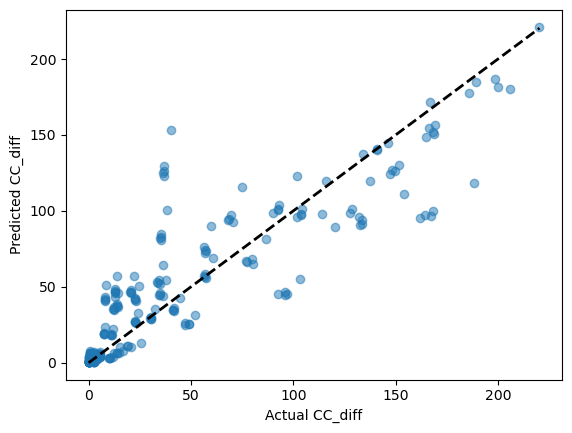

In [38]:
plt.scatter(df_pred['cc_diff'], df_pred['Adjusted_Predicted2'], alpha=0.5, label='CC_diff')
plt.plot([df_pred['cc_diff'].min(), df_pred['cc_diff'].max()], [df_pred['cc_diff'].min(), df_pred['cc_diff'].max()], 'k--', lw=2)
plt.ylabel('Predicted CC_diff')
plt.xlabel('Actual CC_diff')
plt.show()